#### Analysing the top reason for violence during June to October between 1988 and 1993 in California

In [79]:
import pandas as pd
import calendar as cal
import seaborn as sns
import matplotlib.pyplot as plt

import os, operator
import json
from nltk.tag import pos_tag # for tree and chunks

import nltk
import requests, configparser, os, sys, json, glob
from nltk.tag import pos_tag
from nltk import Tree
from nltk import ne_chunk
from nltk.corpus import stopwords
from datetime import datetime

import numpy as np

In [80]:
#constant variables

state = 'California'
parent_dir = '../data/nytimes_data/California_88_93'
homicide_file = '..\data\\raw_data\Analysis_1\homicide-reports\homicide_db.csv'
years_for_analysis = [1988,1989,1990,1991,1992,1993]
output_folder = "..\data\\processed\Analysis_2\\"

In [81]:
#reading homicide csv file
df_homicide = pd.read_csv(homicide_file)
df_homicide['count'] = 1
df_homicide.columns

#Various columns from homicide data set

C:\Users\Rainbow\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source', 'count'],
      dtype='object')

In [82]:
df_homicide_california = df_homicide[df_homicide['State']==state]
df_homicide_california = df_homicide_california[df_homicide_california['Year'].isin(years_for_analysis)]
#df_homicide_california.head()

In [83]:
df_homicide_california_byYear = df_homicide_california.groupby('Year').sum()
df_homicide_california_byYear = df_homicide_california_byYear.reset_index()
df_homicide_california_byYear

,Year,Record ID,Incident,Victim Age,Victim Count,Perpetrator Count,count
0,1988,509102055,33003,103499,332,698,3135
1,1989,618720138,44733,110002,280,937,3412
2,1990,778260585,56852,121055,408,1090,3862
3,1991,924170349,61791,127358,452,847,4146
4,1992,1030153565,67748,129661,478,762,4195
5,1993,1177773175,62808,136940,682,872,4369


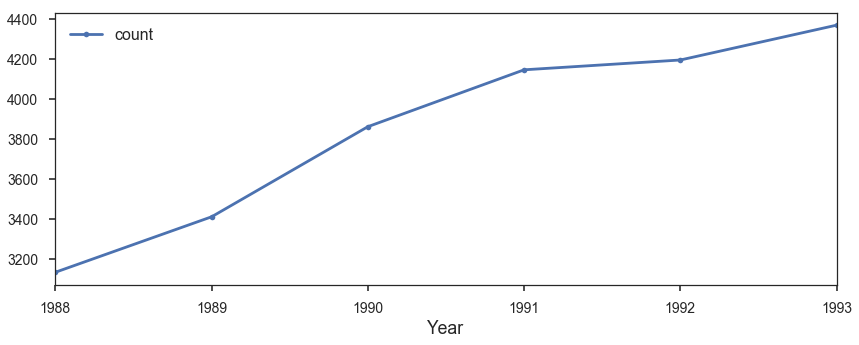

In [84]:
#homicide rate from 1988 to 1993
df_homicide_california_byYear.plot(x='Year', y='count', marker='.',figsize=(14, 5),fontsize=14)
plt.show()

In [85]:
#writing output to csv file
df_homicide_california_byYear.to_csv(output_folder+'Murder_rate_Cali_yearly.csv', sep=',', encoding='utf-8')

In [86]:
df_homicide_california_crime = df_homicide_california.groupby('Crime Type').sum()
df_homicide_california_crime = df_homicide_california_crime.reset_index()
df_homicide_california_crime = df_homicide_california_crime[['Crime Type','Victim Count','count']]
df_homicide_california_crime.sort(ascending=False,columns='count',inplace=True)
#df_homicide_california_crime
#crime_type : 	Murder or Manslaughter, Manslaughter by Negligence	

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


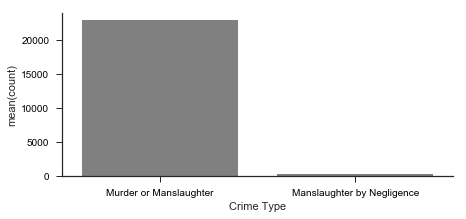

In [87]:
#plotting a bar chart to identify the type of crimes occuring in California

sns.set(style="ticks")
clrs = ['grey' ]# if (x < max(values)) else 'red' for x in values

# This Function takes as input a custom palette
g = sns.barplot(x="Crime Type", y='count',data=df_homicide_california_crime,palette=clrs)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(7,3)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelcolor="black")
plt.show()

#the type of crimes occuring in California

##### Note: The highest crime in California is man slaughter or murder

In [88]:
#writing output to csv file
df_homicide_california_crime.to_csv(output_folder+'Crime_type_Cali.csv', sep=',', encoding='utf-8')

#### Identifying the weapons used to murder

In [89]:
df_homicide_california_weapon = df_homicide.groupby('Weapon').sum()
df_homicide_california_weapon = df_homicide_california_weapon.reset_index()
df_homicide_california_weapon = df_homicide_california_weapon[['Weapon','Victim Count','count']]

In [90]:
df_homicide_california_weapon.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_weapon = df_homicide_california_weapon[:7]
df_homicide_california_weapon_plot = df_homicide_california_weapon[['Weapon','count']]

df_homicide_california_weapon_plot

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Weapon,count
8,Handgun,317484
9,Knife,94962
0,Blunt Object,67337
6,Firearm,46980
15,Unknown,33192
12,Shotgun,30722
11,Rifle,23347


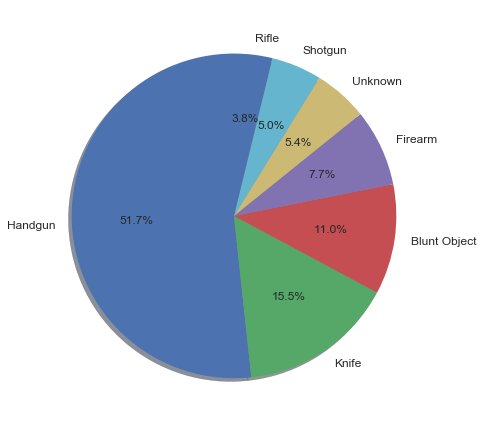

In [91]:
#plot the pie chart to represent the weapons used to conduct murder or slaughter

ax1 = plt.subplot(121, aspect='equal')
df_homicide_california_weapon_plot.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=True, labels=df_homicide_california_weapon_plot['Weapon'], legend = False, fontsize=12,figsize=(16, 16))
ax1.set_ylabel('')
plt.show()

##### Note: The information shows that most number of slaughter in California has happened due to guns during June to October from 1988 to 1993. 

In [92]:
#writing output to csv file
df_homicide_california_weapon_plot.to_csv(output_folder+'Cali_murder_weapons.csv', sep=',', encoding='utf-8')

In [93]:
df_homicide_california_weapon.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_weapon = df_homicide_california_weapon.reset_index()

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


#### Further analysing the articles released in NYTimes related to California during this period!

In [94]:
file_count_dict = {}
subject_dirs = [os.path.join(parent_dir, dir) for dir in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, dir))]

for dir in subject_dirs:
    dir_name = dir.replace((parent_dir+'\\'),'')
    file_count_dict[dir_name] = 0
    csv_files = [os.path.join(dir, json) for json in os.listdir(dir) if os.path.isfile(os.path.join(dir, json)) and json.endswith('.json')]
    for file in csv_files:
        file_name = file.replace((dir+'\\'),'')
        url = (parent_dir+'\\')+dir_name+'/'+file_name
        with open(url) as data_file:    
            file_data = json.load(data_file)
            pub_date = file_data['pub_date']
            dt = pd.to_datetime(pub_date)
            mon = dt.month
            #print(mon)
            if mon >= 8 and mon <=10:
                file_count_dict[dir_name] = file_count_dict[dir_name] + 1


#### Identifying the various commonly discussed issues/subjects in California! 

In [95]:
#pd.DataFrame(word_count.items(),columns=['Word', 'Count'])
df_subject_dirs_sorted = pd.DataFrame.from_dict(file_count_dict,orient='index')
df_subject_dirs_sorted = df_subject_dirs_sorted.reset_index()
df_subject_dirs_sorted.columns = ['Word', 'Count']
df_subject_dirs_sorted.sort(ascending=False,columns='Count',inplace=True)
df_subject_dirs_sorted = df_subject_dirs_sorted.reset_index()

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [96]:
list_subject_dirs_sorted = df_subject_dirs_sorted['Word'].tolist()
list_subject_dirs_sorted = list_subject_dirs_sorted
list_subject_dirs_sorted

['LAW AND LEGISLATION',
 'EARTHQUAKES',
 'FINANCES',
 'ELECTIONS',
 'BUDGETS AND BUDGETING',
 'ELECTION ISSUES',
 'EDUCATION AND SCHOOLS',
 'REFERENDUMS',
 'SUITS AND LITIGATION',
 'MERGERS, ACQUISITIONS AND DIVESTITURES',
 'LABOR',
 'GOVERNMENT BONDS',
 'AIR POLLUTION',
 'DISCRIMINATION',
 'FIRES AND FIREMEN',
 'DECISIONS AND VERDICTS',
 'INSURANCE',
 'ROADS AND TRAFFIC',
 'ECONOMIC CONDITIONS AND TRENDS',
 'TELEPHONES',
 'GOVERNORS (US)',
 'PRESIDENTIAL ELECTION OF 1992',
 'AUTOMOBILES',
 'ETHICS',
 'TEXTBOOKS',
 'WINES',
 'TAXATION',
 'FOREST AND BRUSH FIRES',
 'HOMOSEXUALITY',
 'AUTOMOBILE INSURANCE AND LIABILITY',
 'CORRECTION STORIES',
 'HISTORY',
 'LEGISLATURES',
 'STATE AND LOCAL AID (US)',
 'OIL (PETROLEUM) AND GASOLINE',
 'FOOD',
 'CHILDREN AND YOUTH',
 'IMMIGRATION AND EMIGRATION',
 'BANKS AND BANKING',
 'SMOKING',
 'MEDICINE AND HEALTH',
 'REFORM AND REORGANIZATION',
 'RATES',
 'PRESIDENTIAL ELECTION OF 1988',
 'STANDARDS AND STANDARDIZATION',
 'CONSUMER PROTECTION',
 'PUBL

#### Analysing above frequently discussed subjects and fetching following topics : 

In [97]:
california_issues = ['MURDERS AND ATTEMPTED MURDERS','CAPITAL PUNISHMENT','ACCIDENTS AND SAFETY','DISCRIMINATION',
                    'FRAUDS AND SWINDLING','CRIME AND CRIMINALS','SENTENCES (CRIMINAL)','DRUG ABUSE AND TRAFFIC',
                   'UNEMPLOYMENT AND JOB MARKET','TRIALS','BANKRUPTCIES','GUN CONTROL','PRISONS AND PRISONERS',
                   'SEX CRIMES','CHILD ABUSE','RACKETEERING AND RACKETEERS','DEATH','THREATS AND THREATENING MESSAGES',
                   'HUNGER STRIKES','BLACKS (IN US)','BOMBS AND BOMB PLOTS','MASS MURDERS','ASSAULTS','SERIAL MURDERS',
                   'DRUG TRAFFIC','DRUG ADDICTION AND ABUSE','DRUGS AND DRUG TRADE','POISONING AND POISONS','MONEY LAUNDERING',
                   'SHOOTINGS','PROSTITUTION','POACHING','ASSASSINATIONS AND ATTEMPTED ASSASSINATIONS','MANSLAUGHTER',
                   'LOOT AND LOOTING','HEROIN']
df_subject_dirs_sorted_violence = df_subject_dirs_sorted[df_subject_dirs_sorted['Word'].isin(california_issues)]
df_subject_dirs_sorted_violence = df_subject_dirs_sorted_violence[:9]
df_subject_dirs_sorted_violence.sort(ascending=False,columns='index',inplace=True)
df_subject_dirs_sorted_violence

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,Word,Count
93,583,SENTENCES (CRIMINAL),3
121,490,POISONING AND POISONS,2
70,439,MURDERS AND ATTEMPTED MURDERS,5
114,338,HUNGER STRIKES,3
58,279,FRAUDS AND SWINDLING,5
82,204,DRUG ABUSE AND TRAFFIC,4
13,196,DISCRIMINATION,12
62,104,CAPITAL PUNISHMENT,5
115,2,ACCIDENTS AND SAFETY,3


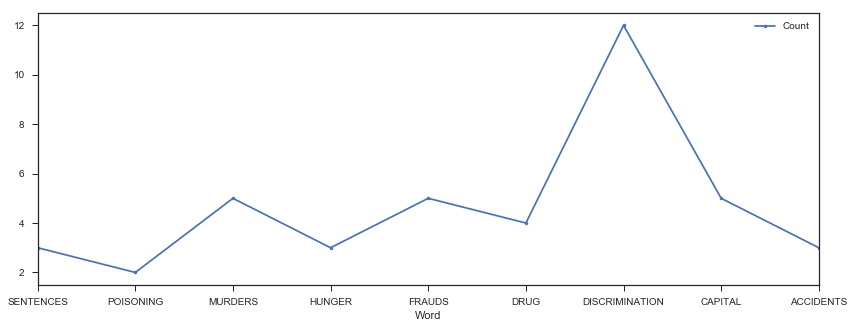

In [98]:
df_subject_dirs_sorted_violence['Word'] = df_subject_dirs_sorted_violence['Word'].str.split().str.get(0)
df_subject_dirs_sorted_violence.plot(x='Word', y='Count', marker='.',figsize=(14, 5))
plt.show()

##### Note: The analysis shows that, in California at this period there was a large amount of discrimination followed by murder and capital punishments. The amount of hate crime was really high during this period along with very less or no gun control. This hence has led to a series of violent crimes in California. 

In [99]:
#writing output to csv file
df_subject_dirs_sorted_violence.to_csv(output_folder+'Cali_concerns_1988.csv', sep=',', encoding='utf-8')